## **Model Comparison**

Package import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

Data import

In [2]:
from google.colab import files
upload = files.upload()

Saving scores.p to scores.p


In [3]:
upload = files.upload()

Saving scores.p to scores (1).p


Load model result to data fram

In [4]:
data = pickle.load(open("scores.p", "rb"))

In [5]:
data.update(pickle.load(open("arima_score.p", "rb")))

In [6]:
data

{'LinearRegression': {'rmse': 16221.040790693221,
  'mae': 12433.0,
  'r2': 0.9907155879704752},
 'RandomForest': {'rmse': 19612.805043304405,
  'mae': 16511.0,
  'r2': 0.9864269829234903},
 'XGBoost': {'rmse': 13574.792631933646,
  'mae': 11649.666666666666,
  'r2': 0.9934977542289017},
 'LSTM': {'rmse': 17647.13227647295, 'mae': 13217.25, 'r2': 0.989011326874836},
 'ARIMA': {'rmse': 14959.89346608319,
  'mae': 11265.335748412077,
  'r2': 0.9835642876238073}}

In [8]:
data_list = []
for key, val in data.items():
  t_data = [key, val["rmse"], val["mae"], val["r2"]]
  data_list.append(t_data)

In [9]:
data_list

[['LinearRegression', 16221.040790693221, 12433.0, 0.9907155879704752],
 ['RandomForest', 19612.805043304405, 16511.0, 0.9864269829234903],
 ['XGBoost', 13574.792631933646, 11649.666666666666, 0.9934977542289017],
 ['LSTM', 17647.13227647295, 13217.25, 0.989011326874836],
 ['ARIMA', 14959.89346608319, 11265.335748412077, 0.9835642876238073]]

In [11]:
data_set = pd.DataFrame(data_list, columns=['model', 'rmse', 'mae', 'r2'])

In [12]:
data_set

,model,rmse,mae,r2
0,LinearRegression,16221.040791,12433.000000,0.990716
1,RandomForest,19612.805043,16511.000000,0.986427
2,XGBoost,13574.792632,11649.666667,0.993498
3,LSTM,17647.132276,13217.250000,0.989011
4,ARIMA,14959.893466,11265.335748,0.983564


## **Plot comparison**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


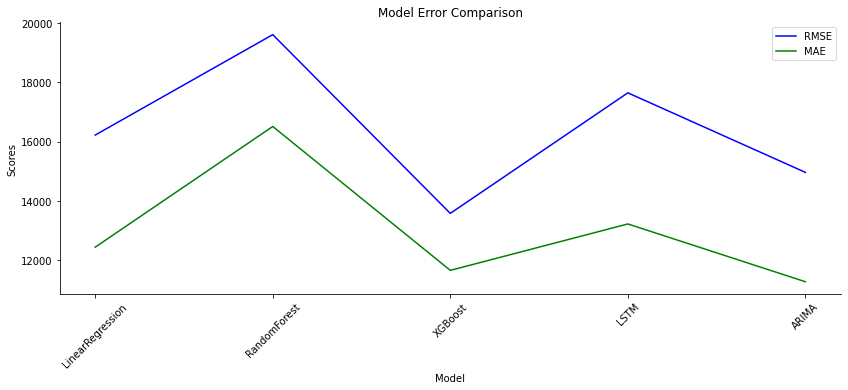

In [15]:
fig, axis = plt.subplots(figsize=(14, 5))
sns.lineplot(np.arange(len(data_set)), 'rmse', data=data_set, ax=axis, 
              label='RMSE', color='Blue')
sns.lineplot(np.arange(len(data_set)), 'mae', data=data_set, ax=axis, 
              label='MAE', color='Green')

plt.xticks(np.arange(len(data_set)),rotation=45)
axis.set_xticklabels(data_set['model'])
axis.set(xlabel = "Model",
        ylabel = "Scores",
        title = "Model Error Comparison")
sns.despine()

plt.savefig(f'output/compare_models.png')

In [16]:
average_monthly_sales = 894478
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

In [17]:
percentage_off

1.3

XGboost is making the prediction closer to the actual expected. 1.3% of closeness is identified